In [1]:
import math
import warnings

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.cross_decomposition import PLSRegression

%matplotlib inline
sns.set_style('white')

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

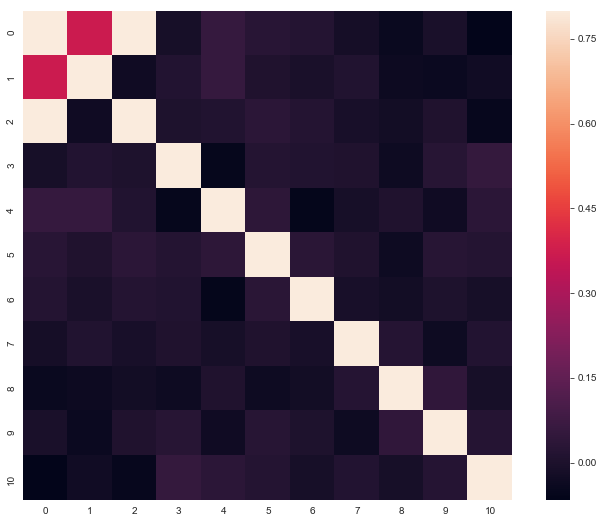

In [2]:
# Number of datapoints in outcome.
n = 1000

# Number of features.
p = 10

# Create random normally distributed data for parameters.
X = np.random.normal(size=n * p).reshape((n, p))

# Create normally distributed outcome related to parameters but with noise.
y = X[:, 0] + 2 * X[:, 1] + np.random.normal(size=n * 1) + 5



# Check out correlations. First column is the outcome.
f, ax = plt.subplots(figsize=(12, 9))
corrmat = pd.DataFrame(np.insert(X, 0, y, axis=1)).corr()

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

R-squared regression: 0.8277778190799905
R-squared PLSR: 0.827777694363547


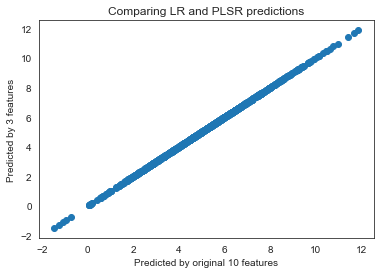

In [3]:
# Fit a linear model with all 10 features.
regr = linear_model.LinearRegression()
regr.fit(X, y)

# Save predicted values.
Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X, y))

# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 3 dimensions.
pls1 = PLSRegression(n_components=3)

# Reduce X to R(X) and regress on y.
pls1.fit(X, y)

# Save predicted values.
Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X, y))

# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 3 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

### Change the way y is calculated (Iteration 1):
y = X[:, 0] + 2 * X[:, 1] + np.random.normal(size=n * 1) + 5 ---->>
y = X[:, 5] + 2 * X[:, 1] + np.random.normal(size=n * 1) + 5

,0,1,2,3,4,5,6,7,8,9,10
0,1.000000,-0.051811,0.825861,-0.031504,-0.032234,0.009684,0.392695,0.007506,-0.005696,-0.017324,-0.038712
1,-0.051811,1.000000,-0.060096,-0.028413,0.028544,-0.021065,0.014677,0.060460,-0.059899,0.013855,-0.024758
2,0.825861,-0.060096,1.000000,-0.055381,-0.017849,0.007074,-0.007548,-0.008731,0.015501,-0.022916,-0.014784
3,-0.031504,-0.028413,-0.055381,1.000000,0.004165,0.027828,-0.026573,-0.082491,0.001508,-0.006091,-0.047138
4,-0.032234,0.028544,-0.017849,0.004165,1.000000,-0.035890,-0.039491,0.045030,-0.048536,0.048058,-0.015234
5,0.009684,-0.021065,0.007074,0.027828,-0.035890,1.000000,-0.012551,-0.016100,-0.015840,0.062553,0.049343
6,0.392695,0.014677,-0.007548,-0.026573,-0.039491,-0.012551,1.000000,-0.018427,-0.006806,0.029824,-0.039491
7,0.007506,0.060460,-0.008731,-0.082491,0.045030,-0.016100,-0.018427,1.000000,0.038213,0.056152,0.028634
8,-0.005696,-0.059899,0.015501,0.001508,-0.048536,-0.015840,-0.006806,0.038213,1.000000,-0.010214,-0.052227
9,-0.017324,0.013855,-0.022916,-0.006091,0.048058,0.062553,0.029824,0.056152,-0.010214,1.000000,-0.029800


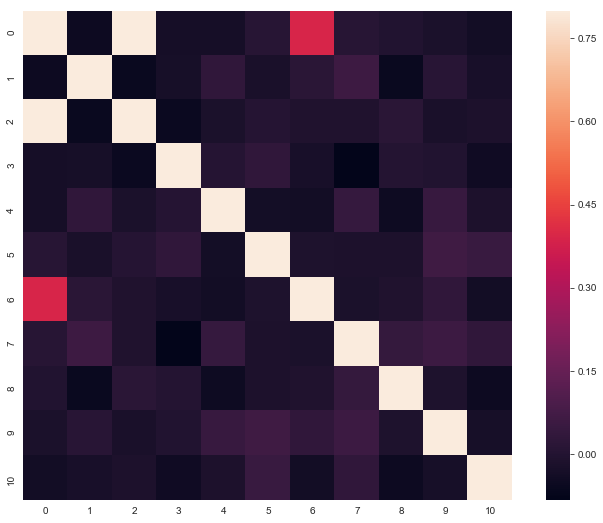

In [29]:
n = 1000

p = 10

X = np.random.normal(size=n * p).reshape((n, p))

y = X[:, 5] + 2 * X[:, 1] + np.random.normal(size=n * 1) + 5

f, ax = plt.subplots(figsize=(12, 9))
corrmat = pd.DataFrame(np.insert(X, 0, y, axis=1)).corr()
display(corrmat)

sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

R-squared regression: 0.8431566826061933
R-squared PLSR: 0.8431563611331059


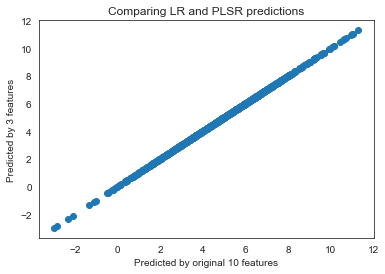

In [30]:
# Fit a linear model with all 10 features.
regr = linear_model.LinearRegression()
regr.fit(X, y)

# Save predicted values.
Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X, y))

# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 3 dimensions.
pls1 = PLSRegression(n_components=3)

# Reduce X to R(X) and regress on y.
pls1.fit(X, y)

# Save predicted values.
Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X, y))

# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 3 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

### Change the way y is calculated (Iteration 2)
y = X[:, 0] + 2 * X[:, 1] + np.random.normal(size=n * 1) + 5 ---->>
y = X[: , 0] + 2 * X[:, 4] + np.random.normal(size=n * 1) + 5

,0,1,2,3,4,5,6,7,8,9,10
0,1.000000,0.402565,0.057370,-0.006604,-0.032799,0.807523,0.006724,-0.006176,0.011691,0.035014,0.056394
1,0.402565,1.000000,0.016122,-0.012658,-0.010787,-0.012786,0.027620,-0.042412,-0.010939,-0.031414,0.075947
2,0.057370,0.016122,1.000000,-0.002324,-0.008565,0.059298,-0.032447,-0.031844,0.008844,-0.026329,-0.033937
3,-0.006604,-0.012658,-0.002324,1.000000,0.001922,-0.015124,-0.030947,0.018319,0.002257,-0.013971,0.013498
4,-0.032799,-0.010787,-0.008565,0.001922,1.000000,-0.007476,-0.063596,0.034744,0.048324,0.023835,0.004936
5,0.807523,-0.012786,0.059298,-0.015124,-0.007476,1.000000,-0.009692,0.000145,0.036022,0.060576,0.036496
6,0.006724,0.027620,-0.032447,-0.030947,-0.063596,-0.009692,1.000000,-0.055048,-0.021317,-0.014706,-0.016699
7,-0.006176,-0.042412,-0.031844,0.018319,0.034744,0.000145,-0.055048,1.000000,-0.009055,-0.038749,0.005235
8,0.011691,-0.010939,0.008844,0.002257,0.048324,0.036022,-0.021317,-0.009055,1.000000,0.004400,-0.027361
9,0.035014,-0.031414,-0.026329,-0.013971,0.023835,0.060576,-0.014706,-0.038749,0.004400,1.000000,-0.009829


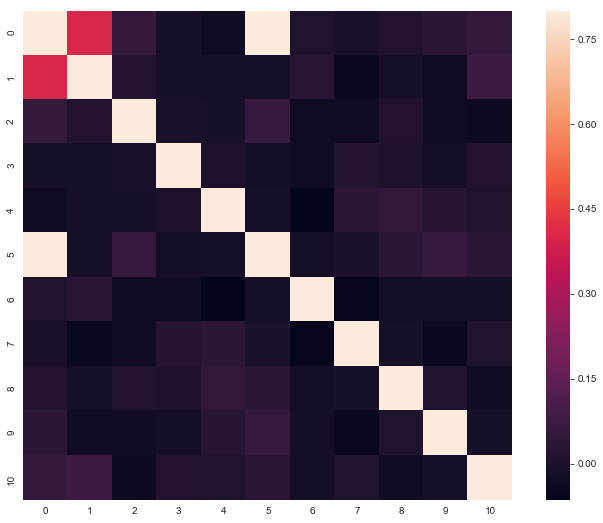

In [33]:
n = 1000

p = 10

X = np.random.normal(size=n * p).reshape((n, p))

y = X[: , 0] + 2 * X[:, 4] + np.random.normal(size=n * 1) + 5

f, ax = plt.subplots(figsize=(12, 9))
corrmat = pd.DataFrame(np.insert(X, 0, y, axis=1)).corr()
display(corrmat)

sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

R-squared regression: 0.8235362233739931
R-squared PLSR: 0.8235360958202774


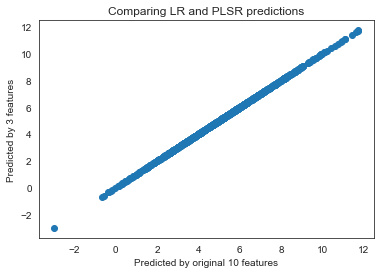

In [34]:
# Fit a linear model with all 10 features.
regr = linear_model.LinearRegression()
regr.fit(X, y)

# Save predicted values.
Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X, y))

# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 3 dimensions.
pls1 = PLSRegression(n_components=3)

# Reduce X to R(X) and regress on y.
pls1.fit(X, y)

# Save predicted values.
Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X, y))

# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 3 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

### Change the way y is calculated (Iteration 1):
y = X[:, 0] + 2 * X[:, 1] + np.random.normal(size=n * 1) + 5 ---->>
y = X[:, 5] + 2 * X[:, 1] + np.random.normal(size=n * 1) + 5

,0,1,2,3,4,5,6,7,8,9,10
0,1.000000,-0.005622,-0.019362,0.020363,-0.024435,-0.015091,0.002890,0.022024,0.833828,0.417394,0.048076
1,-0.005622,1.000000,0.003707,-0.032097,0.042381,-0.005791,-0.003981,0.000991,0.000472,0.005916,0.008635
2,-0.019362,0.003707,1.000000,-0.029246,-0.014384,0.014081,0.008475,-0.000381,-0.011355,-0.028450,-0.032799
3,0.020363,-0.032097,-0.029246,1.000000,-0.012779,0.078253,-0.008151,-0.020279,-0.006337,0.017498,0.022933
4,-0.024435,0.042381,-0.014384,-0.012779,1.000000,0.022330,0.023874,0.003601,-0.008711,-0.036928,-0.038337
5,-0.015091,-0.005791,0.014081,0.078253,0.022330,1.000000,-0.006743,0.005712,0.010044,-0.037076,0.024802
6,0.002890,-0.003981,0.008475,-0.008151,0.023874,-0.006743,1.000000,-0.031290,0.009951,0.037495,0.036408
7,0.022024,0.000991,-0.000381,-0.020279,0.003601,0.005712,-0.031290,1.000000,0.043522,-0.012195,-0.007011
8,0.833828,0.000472,-0.011355,-0.006337,-0.008711,0.010044,0.009951,0.043522,1.000000,0.049769,0.045243
9,0.417394,0.005916,-0.028450,0.017498,-0.036928,-0.037076,0.037495,-0.012195,0.049769,1.000000,0.033722


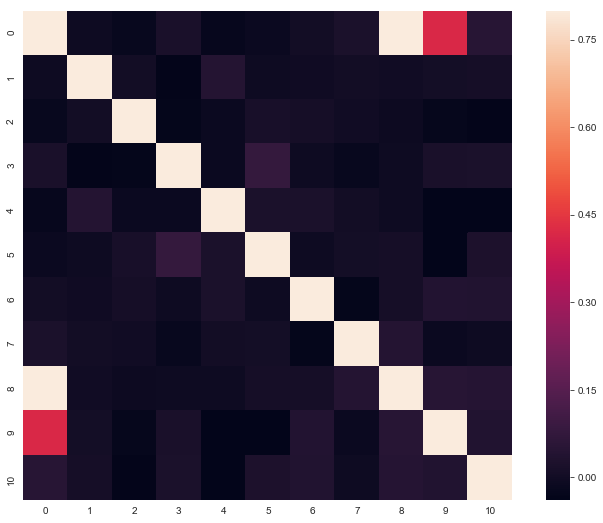

In [37]:
n = 1000

p = 10

X = np.random.normal(size=n * p).reshape((n, p))

y = X[: , 8] + 2 * X[:, 7] + np.random.normal(size=n * 1) + 5

f, ax = plt.subplots(figsize=(12, 9))
corrmat = pd.DataFrame(np.insert(X, 0, y, axis=1)).corr()
display(corrmat)

sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

R-squared regression: 0.8379130525929807
R-squared PLSR: 0.8379130128596683


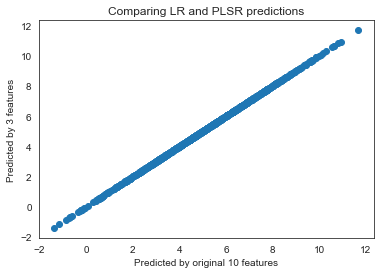

In [38]:
# Fit a linear model with all 10 features.
regr = linear_model.LinearRegression()
regr.fit(X, y)

# Save predicted values.
Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X, y))

# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 3 dimensions.
pls1 = PLSRegression(n_components=3)

# Reduce X to R(X) and regress on y.
pls1.fit(X, y)

# Save predicted values.
Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X, y))

# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 3 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()